<h1 style = "background-color: #f5dff7; font-size:35px; font-weight:bold; text-align:center; padding:30px"> Data Visualizations with Python (Final) </h1>

<section style = "background-color: #e9f6f7; padding: 25px; font-size:20px"> 
<p> In this project, I will generate the following visualizations with Python Libraries: </p>
<ul> 
    <li style = "font-weight: bold"> <a href = "#Pair-Plots" > Pair Plots </a></li> 
    <li style = "font-weight: bold"> <a href = "#Heatmap"> Heatmap </a></li>
    <li style = "font-weight: bold"><a href = "#Joint-Plots"> Joint Plots </a></li>
    <li style = "font-weight: bold"><a href = "#Swarm-Plots"> Swarm Plots </a></li>
    <li style = "font-weight: bold"><a href = "#Bubble-Charts"> Bubble Charts </a></li>
    <li style = "font-weight: bold"><a href = "#Regression-Plots"> Regression Plots </a></li>
</ul>


</section>

<section name = "Pair-Plot" style = "background-color: #870345;padding:5px"> </section>

# Import and Clean Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
data = pd.read_csv("CarPrice.csv", index_col = "car_ID")
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Dataset Information

In [6]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

<table border = 2 align = left  style = "border: 1px solid black;">  
  <caption style = "text-align:center; font-size:30px; font-weight:bold;">Dataset Details</caption> 

    
  <tr style = "font-size:20px; border: 1px solid black;">
    <th style = "text-align:left">N.</th>
    <th style = "text-align:left">Column</th>
    <th style = "text-align:left">Description</th>
    <th style = "text-align:left">Data Type </th>
  </tr>

 <tr style = "background-color:#e1edeb; font-size:20px; font-weight:bold;border: 1px solid black;">
     <td colspan = 4 style = "text-align:center"> General Information </td>
 </tr>

  <tr style = "border: 1px solid black;">
    <td>1.</td>
    <td>symboling</td>
    <td>Risk rating of the car (-2 to +3). Higher values mean riskier cars.</td>
    <td><font color = "darkblue">integer </font></td>
  </tr>

  <tr  style = "border: 1px solid black;">
    <td>2.</td>
    <td>CarName </td>
    <td>Name of the car (often includes brand and model).</td>
    <td><font color = "darkblue">string </font> </td>
  </tr>

  <tr style = "border: 1px solid black;">
    <td>3.</td>
    <td>fueltype </td>
    <td>Type of fuel used (e.g., "gas" or "diesel").</td>
    <td><font color = "darkblue">category </font></td>
  </tr>


  <tr style = "border: 1px solid black;">
    <td>4.</th>
    <td>aspiration  </td>
    <td>Type of engine aspiration. "std" - Naturally aspirated engine., "turbo" - Turbocharged engine.</td>
    <td><font color = "darkblue">category </font></td>
  </tr>

<tr style = "border: 1px solid black;">
    <td>5.</td>
    <td>doornumber </td>
    <td>Number of doors ("two" or "four").</td>
    <td><font color = "darkblue">category </font></td>
  </tr>

  <tr style = "border: 1px solid black;">
    <td>6.</td>
    <td>carbody  </td>
    <td>Body style of the car (e.g., sedan, hatchback, wagon, hardtop, convertible).</td>
    <td><font color = "darkblue">category </font></td>
  </tr>

  <tr>
    <td>7.</td>
    <td>drivewheel </td>
    <td>Type of drivetrain: "fwd"-front-wheel drive, "rwd" - rear-wheel drive, "4wd" - four-wheel drive</td>
    <td><font color = "darkblue">category </font></td>
  </tr>


  <tr style = "border: 1px solid black;">
    <td>8.</th>
    <td>enginelocation   </td>
    <td>Where the engine is placed: "front" - front-mounted engine, "rear" - Rear-mounted engine </td>
    <td><font color = "darkblue">category </font></td>
  </tr>


 <tr style = "background-color:#e1edeb; font-size:20px; font-weight:bold;">
     <td colspan = 4 style = "text-align:center"> Car Dimensions & Weight </td>
 </tr>

  <tr style = "border: 1px solid black;">
    <td>9.</td>
    <td>wheelbase  </td>
    <td> Distance between the front and rear axles (in inches).</td>
    <td><font color = "darkblue">float </font></td>
  </tr>

  <tr style = "border: 1px solid black;">
    <td>10.</td>
    <td>carlength  </td>
    <td> Length of the car (in inches).</td>
    <td><font color = "darkblue">float </font></td>
  </tr>


  <tr style = "border: 1px solid black;">
    <td>11.</th>
    <td>carwidth   </td>
    <td>Width of the car (in inches).</td>
    <td><font color = "darkblue">float </font></td>
  </tr>



  <tr style = "border: 1px solid black;">
    <td>12.</td>
    <td>carheight </td>
    <td> Height of the car (in inches).</td>
    <td><font color = "darkblue">float </font></td>
  </tr>

  <tr style = "border: 1px solid black;">
    <td>13.</td>
    <td>curbweight  </td>
    <td>Weight of the car without passengers or cargo (in pounds).</td>
    <td><font color = "darkblue">float </font></td>
  </tr>

  <tr style = "background-color:#e1edeb; font-size:20px; font-weight:bold;>
    <td colspan = 4 style = "text-align:center">Engine Specifications</td>
  </tr>


  <tr style = "border: 1px solid black;">
    <td>14.</th>
    <td>enginetype   </td>
    <td>Type of engine (e.g., dohc, ohc, ohcf, rotor)</td>
    <td><font color = "darkblue">categorical </font></td>
  </tr>


  <tr style = "border: 1px solid black;">
    <td>15.</td>
    <td>cylindernumber </td>
    <td>Number of cylinders (e.g., three, four, six, eight).</td>
    <td><font color = "darkblue">categorical </font></td>
  </tr>


  <tr style = "border: 1px solid black;">
    <td>16.</td>
    <td>enginesize  </td>
    <td>Engine displacement in cubic centimeters (cc).</td>
    <td><font color = "darkblue">integer </font></td>
  </tr>


  <tr style = "border: 1px solid black;">
    <td>17.</th>
    <td>fuelsystem   </td>
    <td>Type of fuel system (e.g., mpfi, spdi, 2bbl, 1bbl, idi, mfi).</td>
    <td><font color = "darkblue">categorical </font></td>
  </tr>


 <tr style = "border: 1px solid black;">
    <td>18.</td>
    <td>boreratio </td>
    <td>Bore diameter (cylinder width) in inches.</td>
     <td><font color = "darkblue">float </font></td>
  </tr>


  <tr style = "border: 1px solid black;">
    <td>19.</td>
    <td>stroke  </td>
    <td>Piston stroke length in inches.</td>
    <td><font color = "darkblue">float </font></td>
  </tr>


  <tr style = "border: 1px solid black;">
    <td>20</th>
    <td>compressionratio  </td>
    <td>Engine compression ratio: Higher-values $\rightarrow$" More fuel-efficient engines. Lower-values $\leftarrow$" More power output but lower efficiency.   </td>
    <td><font color = "darkblue">float </font></td>
  </tr>

 <tr style = "background-color:#e1edeb; font-size:20px; font-weight:bold;">
     <td colspan = 4 style = "text-align:center"> Performance Metrics </td>
 </tr>


  <tr style = "border: 1px solid black;">
    <td>21.</td>
    <td>horsepower   </td>
    <td>Engine power output (in HP - horsepower). </td>
    <td><font color = "darkblue"> integer </font></td>
  </tr>


  <tr style = "border: 1px solid black;">
    <td>22.</td>
    <td>peakrpm   </td>
    <td>Engine RPM (revolutions per minute) at peak horsepower.</td>
    <td><font color = "darkblue">integer </font></td>
  </tr>


  <tr style = "border: 1px solid black;">
    <td>23.</td>
    <td>citympg   </td>
    <td> Miles per gallon (MPG) in city driving conditions.</td>
    <td><font color = "darkblue">integer </font></td>
  </tr>

  <tr style = "border: 1px solid black;">
    <td>24.</td>
    <td>highwaympg    </td>
    <td> Miles per gallon (MPG) on highways.</td>
    <td><font color = "darkblue">integer </font></td>
  </tr>

 <tr style = "background-color:#e1edeb; font-size:20px; font-weight:bold;">
     <td colspan = 4 style = "text-align:center"> Dependent Variable </td>
 </tr>

  <tr style = "border: 1px solid black;">
    <td>25.</td>
    <td>Price </td>
    <td>Car price (in US dollars). </td>
    <td><font color = "darkblue"> float </font></td>
  </tr>


</table>

Let's do the following tasks in order to clean the dataset:
1.  Change the column name **"symboling"** to **"risk_rating"**.
2.  Check the data types of each column by using <font color ="red">**dtypes**</font> function.
3.  Do data type conversions if needed. While converting the columns with null (missing) values, make them equal to NaN.
4.  Handling missing values is the next step, therefore, ignore the nulls in this task.

In [32]:
data.rename(columns = {"symboling":"risk_rating"},inplace = True)

In [33]:
data.dtypes

risk_rating           int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Important note:
- In this project, I will not apply **Machine Learning** algorithms and will not create models. Therefore, having object data types is actually good for us, because in the visualizations part, we can generate charts for each category.
- However, for generating the **Machine Learning** models, the numerical values are important; hence [doornumber, cylindernumber] columns must be converted to numeric data types.
- For this project, keep the data type of each column as it is. 

<section name = "Pair-Plot" style = "background-color: #870345;padding:5px"> </section>

# Handle Missing Values

In [34]:
# Let's see how many missing values are there in each column
data.isnull().sum()

risk_rating         0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

As is seen from the results, there is not any null values in the dataset. The data is already clean and ready for visualizations.

<section name = "Pair-Plot" style = "background-color: #870345;padding:5px"> </section>

# Pair Plots

<section style = "background-color:#e9f6f7; font-size:20px">
A <font color = "red"> <b> pair plot </b> </font> (also known as a <font color = "red"><b>scatterplot matrix</b></font>) is a type of visualization that displays pairwise relationships between multiple numerical variables in a dataset. It is particularly useful for exploring <b>correlations, distributions, and patterns</b> among variables. The pair plot visualizes <b>continuous numerical variables</b>, meaning categorical variables are generally not included. Each variable in the dataset is plotted against every other variable, resulting in a grid of scatterplots. The x-axis represents one numerical variable, while the y-axis represents another numerical variable, making it easy to observe relationships between them. <b>The diagonal of the pair plot typically contains histograms or kernel density plots of each individual variable, providing insight into their distributions.</b> To read a pair plot, you should examine the scatterplots for patterns such as positive or negative correlations, clusters, or outliers. <font style="background-color:#d0f5f2">If two variables have a linear pattern, they are likely correlated, while scattered points indicate weak or no correlation</font>. <u>In Python, pair plots are primarily created using the Seaborn library</u>, specifically with the <font color = "red"><b>sns.pairplot()</b></font> function, as it provides an easy and aesthetically pleasing way to generate them. <u>While Matplotlib is used for lower-level plotting and customization, Seaborn builds on it and simplifies the process. Pandas itself does not have a built-in pair plot function, but its DataFrame.plot.scatter() method can be used to create individual scatterplots manually.</u> Overall, a pair plot is a powerful tool for visualizing relationships between numerical variables and detecting potential trends in the data.
</section>

In [ ]:
# Task 1. Visualize relationship between [enginesize, horsepower, peakrpm, citympg, price]
# Task 2. Visualize relationship between [risk_rating, curbweight, compressionratio, highwaympg, price]

C:\Users\Vasif\anaconda3\envs\mycoding\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Vasif\AppData\Local\Temp\ipykernel_12968\437846154.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 2000x1000 with 0 Axes>

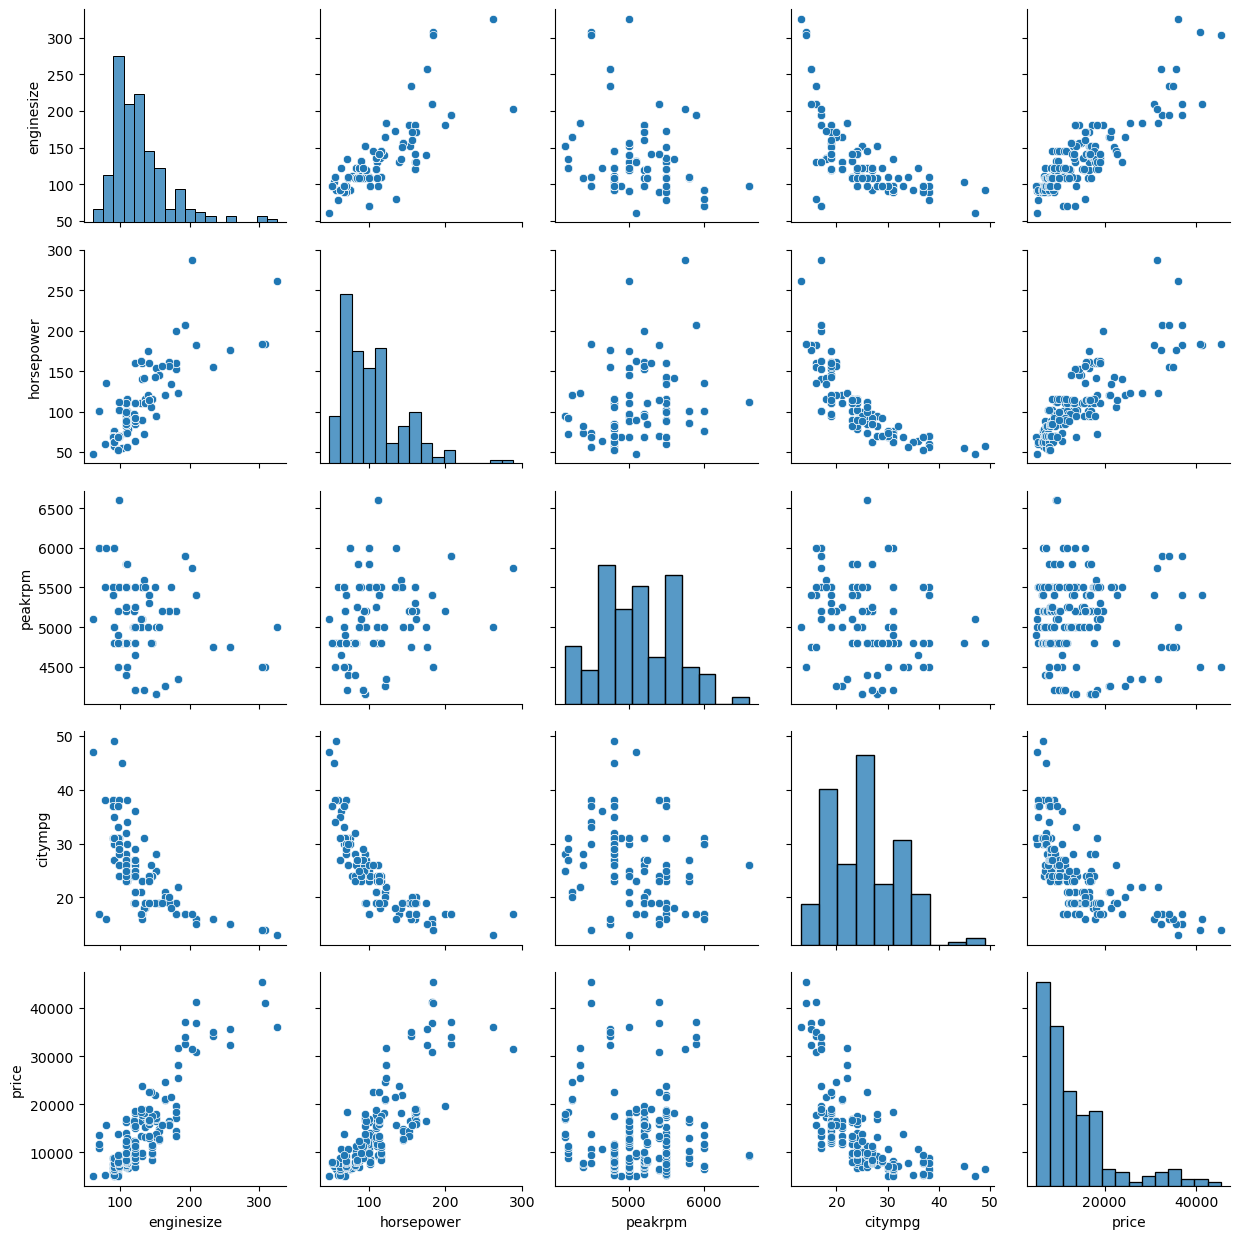

In [28]:
# Task 1. Visualize relationship between [enginesize, horsepower, peakrpm, citympg, price]

selected_columns = ["enginesize", "horsepower", "peakrpm", "citympg", "price"]
plt.figure(figsize = (20,10))
sns.pairplot(data[selected_columns])
plt.tight_layout()

<font size = 3>
    
Observations:
- Enginesize:
    - enginesize and horsepower is strongly correlated with each other.
    - enginesize and price is positively correlated with each other
    - enginesize and citympg is negatively correlated
    - enginesize and peakrpm is not correlated
- Horsepower:
    - horsepower and peakrpm is not correlated
    - horsepower and citympg is strongly, negatively correlated
    - horsepower and price is strongly correlated
- Peakrpm:
    - peakrpm is not correlated with any columns. It strongly acts like a categorical variable.
- Citympg:
    - citympg and price is strongly, negatively correlated.
- Price:
    - It is in positive correlation with "enginesize" and "horsepower"
    - It is in negative correlation with "citympg"
    - It is not in correlation with "peakrpm"
</font>

C:\Users\Vasif\anaconda3\envs\mycoding\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

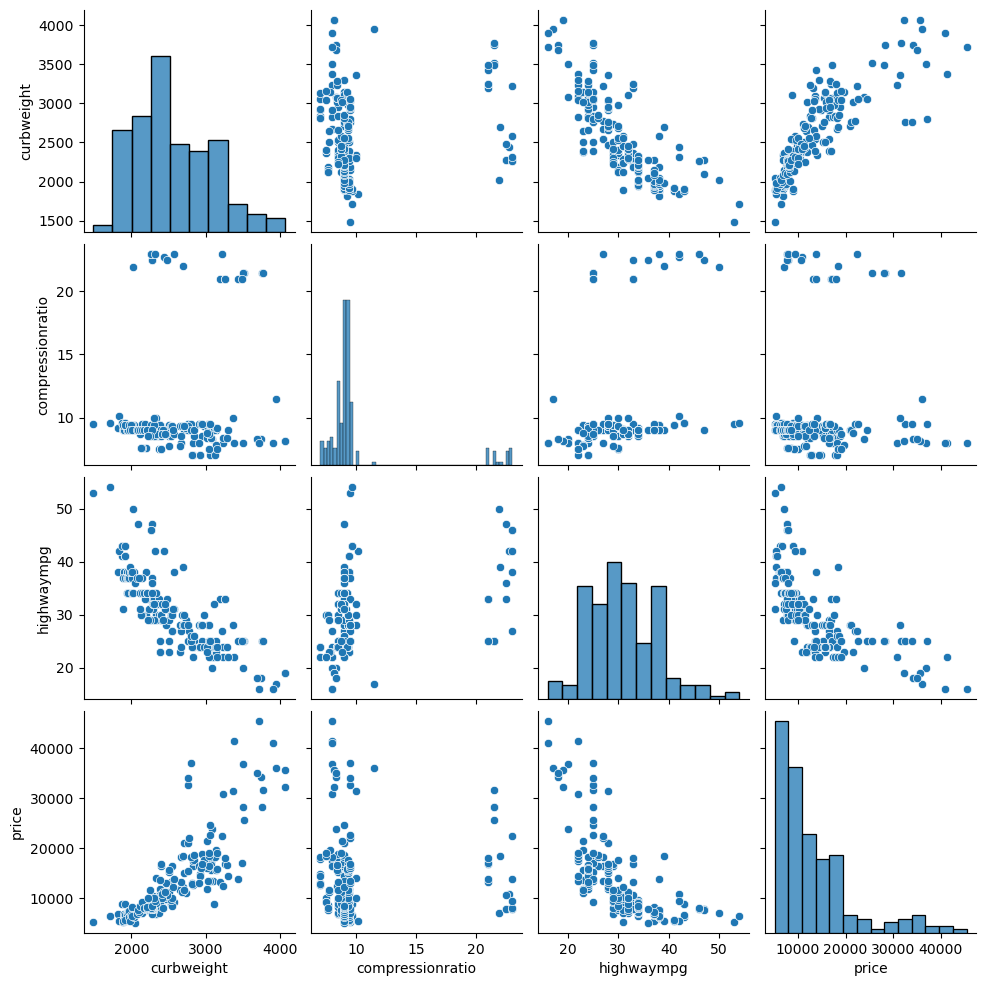

In [36]:
# Task 2. Visualize relationship between [risk_rating, curbweight, compressionratio, highwaympg, price]
selected_columns = ["curbweight", "compressionratio", "highwaympg", "price"]
plt.figure(figsize = (20,10))
sns.pairplot(data[selected_columns])

<font size = 3>
    
Observations:
- Price is in positive correlation with curbweight.
- Price is in negative correlation with highwaympg.
- curbweight and highwaympg is in negative correlation. 
</font>

## Parameters of sns.pairplot()

<section style = "background-color: #f9e6fa; font-size:20px">
<b>sns.pairplot( </b>
<li>  data - The dataset to use for the pair plot. , </li>
<li>   hue - Defines a categorical variable that colors the points in the scatter plots., </li>
<li>    hue_order - Specifies the order of categories when using hue,</li>
<li>  palette- Defines the color palette for the plot., </li>
 <li>   vars - Specifies which numerical variables to include in the pair plot (["horsepower", "price", "curbweight"],
  <li>  x_vars - Manually specify which variables go on the X and Y axes.,
  <li>  y_vars - example:  x_vars=["horsepower", "citympg"], y_vars=["price", "curbweight"],
  <li>  kind - Defines the type of plot for the non-diagonal scatter plots. ("scatter", "reg", "kde"),
  <li>  diag_kind-  Defines the type of plot on the diagonal (which shows distributions) ("hist" or "kde"),
 <li>   markers - Defines different marker styles for categories. (markers=["o", "s", "D"]: circles, squares,diamonds),
 <li>   height- Controls the size of each subplot.,
 <li>   aspect - Controls the aspect ratio of each subplot.,
 <li>   corner - If True, only shows the lower triangle of the plot (hides redundant upper triangle).,
 <li>   dropna - If True, drops missing values before plotting.,
  <li>  plot_kws- Additional keyword arguments for scatter plots: plot_kws={"s": 50, "alpha": 0.5} - pointsize and transparency adjustment,
 <li>   diag_kws - Additional keyword arguments for diagonal plots (hist or kde): diag_kws={"bins": 20},
 <li>   grid_kws- Additional keyword arguments for the overall grid:  grid_kws={"diag_sharey": False},
  <li>  size - Use height instead
<b>) </b>  
</section>

<section name = "Pair-Plot" style = "background-color: #870345;padding:5px"> </section>

# Heatmap

<section style = "background-color:#e9f6f7; font-size:20px"> 
A <b>heatmap</b> is a powerful visualization tool used to represent <b>numerical data</b> in a matrix format, where individual values are displayed using color gradients. It is particularly useful for visualizing <b>relationships, correlations, and patterns</b>b between multiple variables in a dataset. Heatmaps are typically used for <b>continuous numerical variables</b>, as the color intensity reflects the magnitude of the values***. In the context of correlation analysis, a heatmap displays a correlation matrix, where each cell represents the correlation coefficient between two variables. The x-axis and y-axis both represent the numerical variables in the dataset, forming a grid where each intersection shows the correlation between the corresponding variables. The color gradient helps interpret relationships: darker or more intense colors (often red or blue) indicate stronger correlations, while lighter colors (such as white or pale shades) indicate weak or no correlation. To read a heatmap, one should look for high positive correlations (close to +1), negative correlations (close to -1), and areas with little to no correlation (close to 0). In Python, heatmaps are primarily created using the Seaborn library, specifically with the <font color = "red"><b>sns.heatmap()</b></font> function, which allows customization of color maps, annotations, and scaling. Matplotlib provides lower-level functions for creating heatmaps using <font color = "red"><b>imshow()</font></b>, but it requires additional customization. Pandas can generate correlation matrices using the <font color = "red"><b>DataFrame.corr()</b></font> function, which can then be visualized using Seaborn or Matplotlib. Overall, heatmaps are essential for quickly identifying relationships in large datasets and are widely used in exploratory data analysis, particularly for correlation analysis.
</section>

In [47]:
numerical_columns  = data.select_dtypes(include = ["number"])
numerical_columns.head(2)

,risk_rating,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


<Axes: >

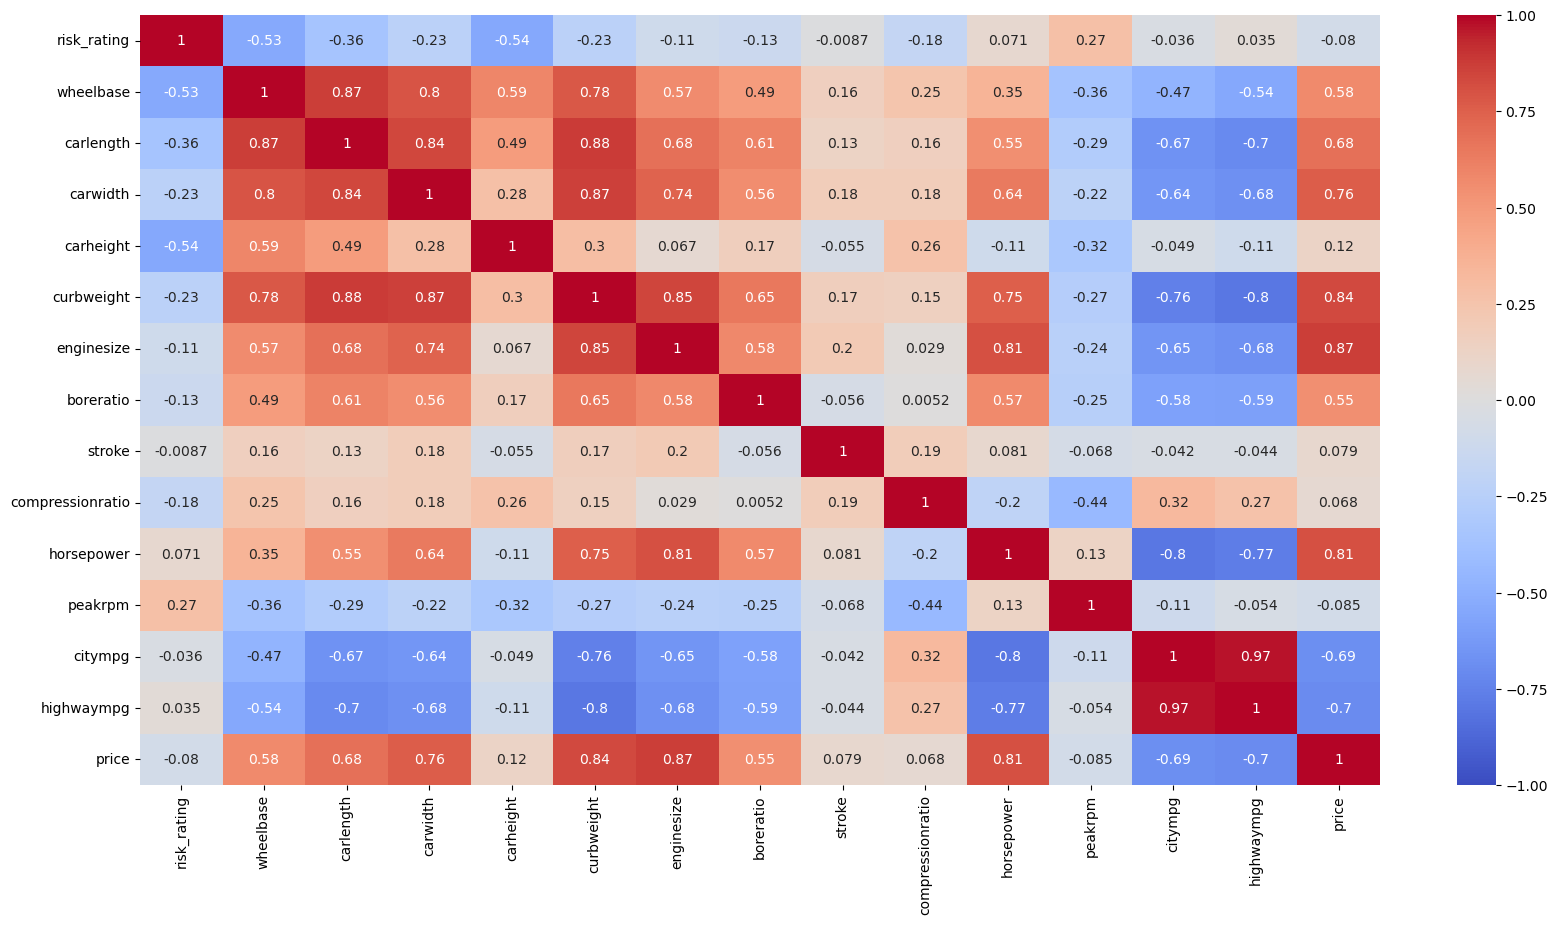

In [52]:
plt.figure(figsize = (20,10))
sns.heatmap(numerical_columns.corr(),vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True)

Observations:
- Positive correlation more than 80%:
    - wheelbase vs carlength
    - carlength vs carwidth
    - carlength vs curbweight
    - carwidth vs curbweight
    - curbweight vs enginesize
    - curbweight vs price
    - enginesize vs horsepower
    - enginesize vs price
    - horsepower vs price
    - citympg vs highwaympg
    - price: curbweight, enginesize, horsepower

<Axes: >

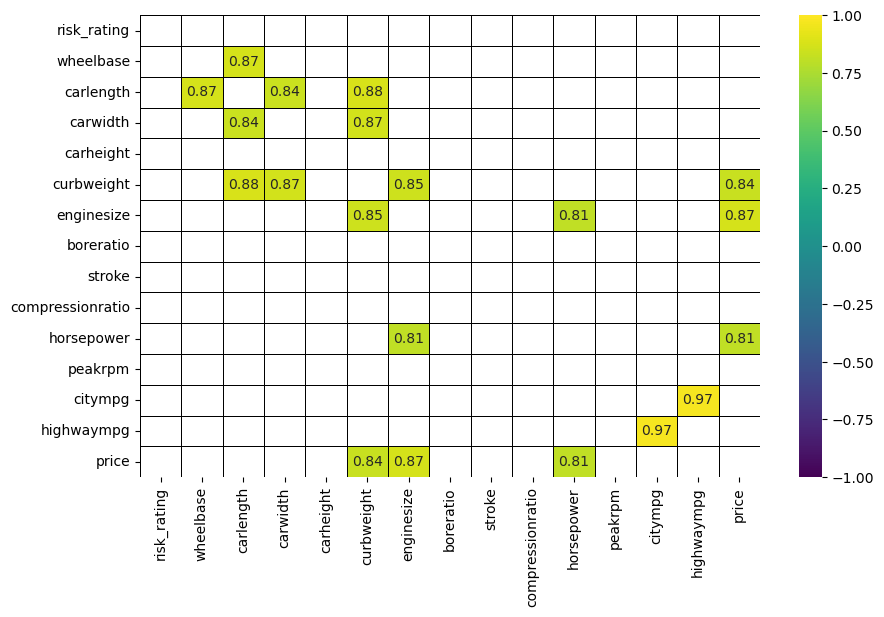

In [104]:
# Positive correlation more than 80%: 
plt.figure(figsize = (10,6))
corr_matrix = numerical_columns.corr()
mask = (corr_matrix < 0.8) | (corr_matrix == 1)
sns.heatmap(corr_matrix, mask = mask, vmin = -1, vmax = 1,cmap = "viridis", annot = True,
            linewidth = 0.5, linecolor = "black")

<Axes: >

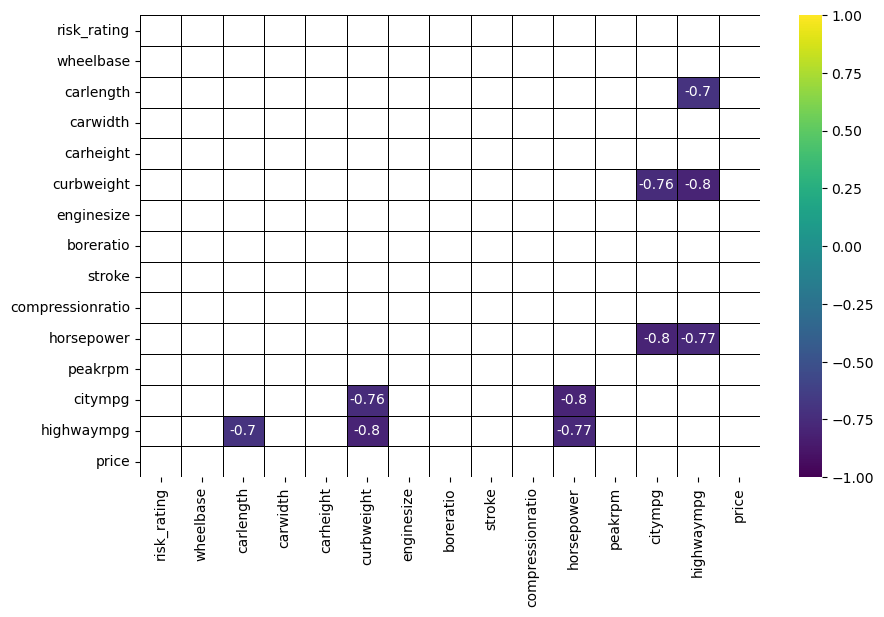

In [107]:
# Negative correlation more than 70%
mask = (corr_matrix > -0.7) 
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, mask = mask, cmap = "viridis", vmin = -1, vmax = 1, annot = True,
            linewidths = 0.5, linecolor ="black")

Observations:
Negative correlation more than 80%:
- carlength vs highwaympg
- curbweight vs citympg
- curbweight vs highwaympg
- horsepower vs citympg
- horsepower vs highwaympg

## Parameters of Heatmap

<section style = "background-color: #f9e6fa; font-size:20px">

<b>sns.heatmap(</b>
<li>    data - data used for heatmap,
<li>      vmin - Set the minimum (vmin) color limits for the heatmap,
<li>      vmax - Set the maximum (vmax) color limits for the heatmap,
<li>     cmap - Defines the colormap (color theme) used in the heatmap. ("coolwarm", "viridis","Blues", "magma", "inferno", "cividis", "YlGnBu", and custom cmap sns.color_palette("light:b", as_cmap=True),
<li>    center - A value that serves as the midpoint in the color scale. (center = 0),
<li>      robust -  If True, ignores extreme values (outliers) when setting color limits (vmin, vmax).,
<li>       annot -  If True, displays numerical values inside the heatmap cells.,
<li>      fmt= String formatting for numbers inside the heatmap cells ('.2g',".1f", ".0f", "%0.2f")
<li>       annot_kws - Customize font size, weight, and color of annotations: annot_kws={"size": 10, "weight": "bold", "color": "black"}
<li>       linewidths - Sets the width of lines between heatmap cells.,
<li>       linecolor -  Sets the color of cell borders.,
<li>      cbar - Shows (True) or hides (False) the color bar on the side.,
<li>      cbar_kws - Customize the color bar (size, location, label, etc.): cbar_kws={"shrink": 0.5, "label": "Correlation Scale"},
<li>       cbar_ax - Manually specify an axis for the color bar (useful in subplots).,
<li>      square -  If True, makes each cell a perfect square.,
<li>      xticklabels -  Controls the row & column labels.,
<li>       yticklabels -  Controls the row & column labels.,
<li>       mask - A Boolean matrix that hides certain parts of the heatmap.,
<li>       ax - Allows integration with Matplotlib subplots.,
)

</section>

In [ ]:
sns.heatmap()

<section name = "Pair-Plot" style = "background-color: #870345;padding:5px"> </section>

# Joint Plots

<section style = "background-color:#e9f6f7; font-size:20px"> 
A <font color = "red"><b>joint plot</b></font> is a type of bivariate visualization that combines scatterplots and univariate distributions to show the relationship between two numerical variables. It is useful for understanding both the correlation between two variables and their individual distributions. <b>A joint plot consists of three main components: the scatterplot in the center, which displays the relationship between the two numerical variables, and the histograms (or kernel density estimates) along the x-axis and y-axis, which represent the distribution of each variable separately.</b> The x-axis corresponds to one numerical variable, while the y-axis corresponds to another, making it easy to identify trends, correlations, and potential outliers. A joint plot can also be modified to display hexbin plots (hexagonal binning for dense data) or regression plots (which include a trend line). To interpret a joint plot, one should examine the scatterplot for patterns, such as linear or nonlinear relationships, clusters, or outliers, while also observing the histograms to understand the spread and skewness of the data. In Python, joint plots are primarily created using the Seaborn library with the <font color = "red"><b>sns.jointplot()</b></font> function, which allows users to customize the plot type (scatter, regression, hexbin, or KDE). While Matplotlib can be used for individual scatterplots and histograms, Seaborn integrates these elements into a single figure, making the visualization more informative. Pandas does not have a built-in joint plot function, but its DataFrame.plot.scatter() method can be used to create individual scatterplots, while histograms can be plotted separately. Overall, joint plots are a valuable tool for visualizing pairwise relationships in a dataset and gaining insights into both correlation and distribution in a single compact figure.

</section>

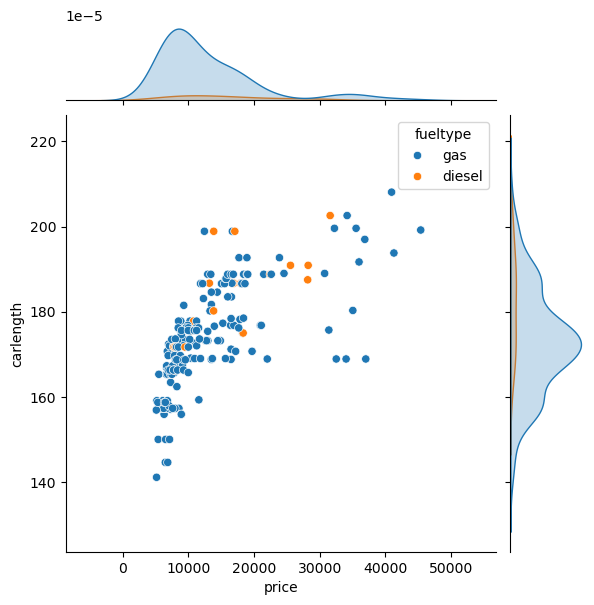

In [115]:
# Task 1. Price vs Carlength grouped by fueltype
sns.jointplot(data = data, x = "price", y="carlength",dropna = True,hue = "fueltype")

Observations:
- jointplont visualizes the relationship between carlength and price
- cars with gas fueltype is more thatn diesel fueltype
- there is a strong positive correlation between carlength and price
- diesel type cars are generally expensive

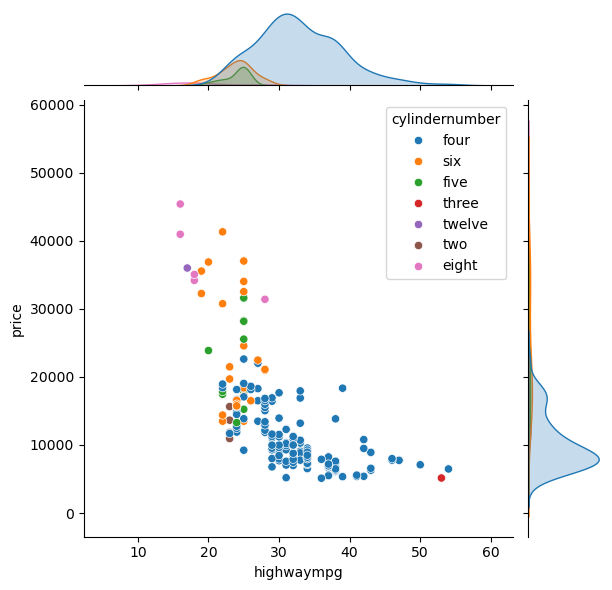

In [125]:
# Task 2. Highwaympg vs price grouped by cylindernumber
sns.jointplot(data =data, x = "highwaympg", y = "price", hue = "cylindernumber")

Observations:
- price and highwaympg has negative correlation. more highway mpg of the car means less price.
- four cylindernumber category cars are less expensive
- eight cylindernumber category cars are more expensive and less highwaympg

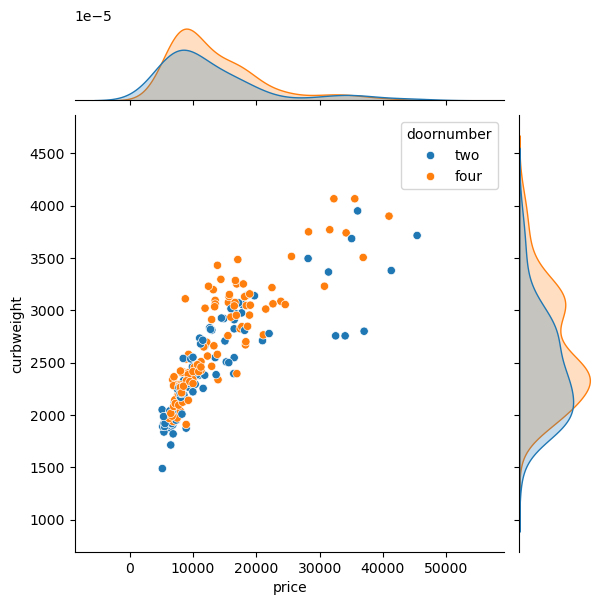

In [133]:
# Task 3.
sns.jointplot(data =data, x = "price", y = "curbweight", hue = "doornumber")

Observations:
- curbweight and price has strong positive correlation.
- more cars have doornumber 4.
- cars with 4 doors, has more correlation with price, however, 2 doors cars has moderate correlation with price and curbweight. 

<section name = "Pair-Plot" style = "background-color: #870345;padding:5px"> </section>

# Swarm Plots

<section style = "background-color:#e9f6f7; font-size:20px"> 
    
A <font color ="red"><b>swarm plot</font> is a categorical scatterplot that provides a visual representation of the distribution of individual data points along a categorical axis while avoiding overlap</b>. Unlike a standard strip plot, a swarm plot adjusts the position of data points along the categorical axis using a jittering technique to ensure that all points are visible and not stacked on top of each other. This makes it particularly useful for visualizing the spread and density of numerical data within different categories. In a swarm plot, the x-axis represents a categorical variable, while the y-axis represents a continuous numerical variable. Each point on the plot corresponds to an individual observation in the dataset. <b>The swarm plot helps in identifying clusters, outliers, and differences in data distribution across categories. It is especially useful when analyzing datasets with relatively small to moderate sample sizes, as it maintains the exact data values rather than aggregating them like a box plot or violin plot.</b> However, for very large datasets, swarm plots can become cluttered and slow to render. In Python, swarm plots are primarily created using the Seaborn library with the <font color = "red"><b>sns.swarmplot()</b></font> function, which allows customization of colors, point sizes, and marker styles. Matplotlib does not have a direct function for swarm plots, but scatterplots with jittering techniques can be used to achieve a similar effect. Pandas also lacks a built-in function for swarm plots, but its DataFrame.plot.scatter() function can be used to generate scatterplots with some manual adjustments. Overall, swarm plots are a great way to visualize distributions within categorical groups while retaining individual data points, making them useful for exploratory data analysis and comparative studies.

</section>

In [134]:
# Task 1. Price Distribution Across Car Body Types

<Axes: xlabel='carbody', ylabel='price'>

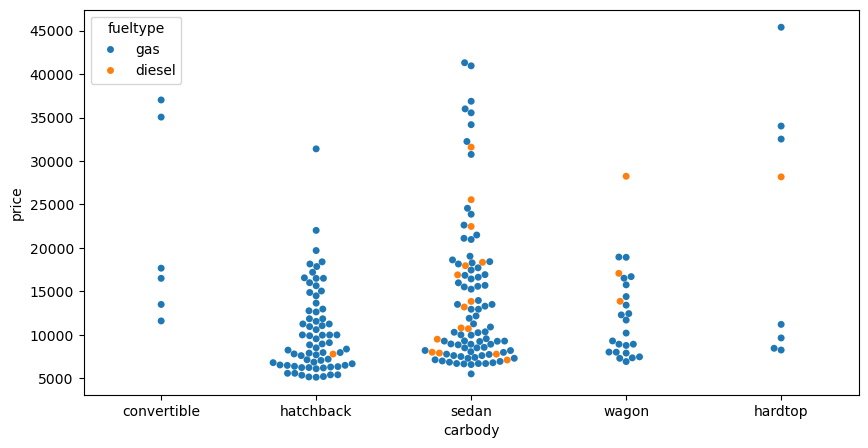

In [137]:
plt.figure(figsize = (10,5))
sns.swarmplot(data = data, x = "carbody", y = "price", hue = "fueltype")

<font size = 3>

Observations: 
- A lot of cars fall in the "hatchback" and "sedan" carbody type, and less fall in "convertible" and  "hardtop"
- Among 5 "carbody" types, the "sedan" category has the more cars with higher price
- "Diesel" fueltype cars have mostly "sedan" carbody.

</font>

In [ ]:
# Task 2. Horsepower by Fuel Type

<Axes: xlabel='fueltype', ylabel='horsepower'>

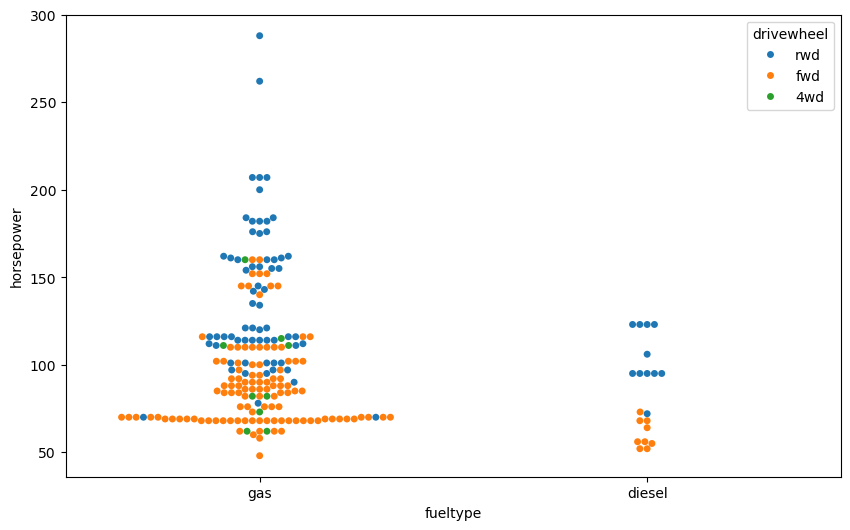

In [143]:
plt.figure(figsize = (10,6))
sns.swarmplot(data = data, x = "fueltype", y = "horsepower", hue = "drivewheel")

<font size = 3>

Observations:
- More cars fall on "gas" fueltype  and they generally have more "Horsepower"
- "Horsepower" more than 150, mainly belong to the cars with "gas" fueltype and "rwd" drivewheel (rear wheel drive).
- There is not any car with "diesel" fueltype that has "4wd" drivewheel.
- "Horsepower" below 100 mainly belong to the cars with "fwd" (front wheel drive) drivewheel. It shows that the cars with rear wheel drive have generally more hoursepower than those with "fwd" and "4wd".
</font>

In [ ]:
# Task 3. Peak RPM by Number of Cylinders

<Axes: xlabel='cylindernumber', ylabel='price'>

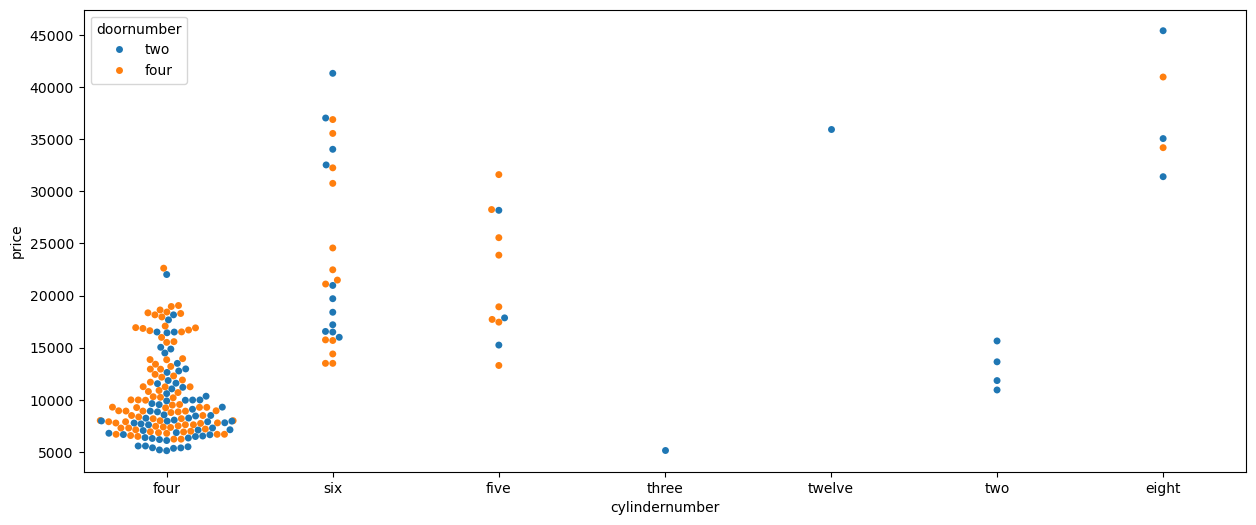

In [154]:
plt.figure(figsize = (15,6))
sns.swarmplot(data=data, x = "cylindernumber", y = "price", hue = "doornumber")

Observations:
- Majority of the cars fall in the category with "cylindernumber" equal to 4, and minority fall in 3 AND 12.
- However, the cars with 4 cylinders, have less prices, comparing to those with 5,6 and 8 cylinders.
- Cars with 5 cylinders have mainly 2 doors, meaning they are mainly sport cars. 

## Parameters of swarmplot

<section style = "background-color: #f9e6fa; font-size:20px">
<b>sns.swarmplot(</b>
<li>   data - The dataset used for the swarm plot.,
<li>    x - column for x,
<li>    y - column for y,
<li>    hue - Adds an extra categorical dimension by coloring the points.,
<li>     order - Defines a custom order for categorical x values.,
<li>     hue_order - Defines a custom order for hue categories.,
<li>    dodge -  If True, separates hue categories instead of overlapping.,
<li>     orient - Specifies vertical or horizontal orientation. ("v" -vertical, "h" - horizontal,
<li>     color - Sets the color for all points (if hue is not used):"blue", "red", "green", "#ff5733" (hex codes).,
<li>    palette - Sets the color palette for hue: "viridis", "coolwarm", "pastel", "dark", "Set2".,
<li>    size - Controls the size of points.,
<li>     edgecolor - Defines the outline color of points: "black", "gray", "red", None.,
<li>     linewidth - Sets the width of point outlines.,
<li>     hue_norm - Normalizes hue values for continuous data: hue_norm=(50, 200),
<li>     log_scale - Uses a logarithmic scale for x or y axes.,
<li>     native_scale - Maintains the original data scale without conversion.,
<li>     formatter - Controls tick formatting for categorical data: formatter=lambda x: x.upper(),
<li>     legend - Controls the hue legend visibility.,
)

<section name = "Pair-Plot" style = "background-color: #870345;padding:5px"> </section>

# Bubble Charts

<section style = "background-color:#e9f6f7; font-size:20px"> 

A <font color = "red"><b>bubble chart</font> is an extension of a scatterplot that visualizes three numerical variables simultaneously by using the x-axis, y-axis, and the size of the bubbles (circles) to represent data points.</b> It is useful for analyzing relationships between two continuous variables while incorporating a third dimension of information through the bubble size. The x-axis and y-axis represent two numerical variables, just like in a standard scatterplot, while the <b>size of each bubble is determined by a third numerical variable</b>, which provides additional insight into the dataset. Sometimes, a fourth variable can be represented using color coding, further enriching the visualization.

To interpret a bubble chart, one should examine the position of the bubbles to understand correlations or trends between the two main numerical variables. Larger bubbles indicate higher values of the third variable, while smaller bubbles represent lower values. The distribution and clustering of bubbles can reveal patterns, outliers, or significant trends within the dataset.

In Python, bubble charts are commonly created using <b>Matplotlib by adjusting the s parameter in the <font color = "red">plt.scatter()</b></font> function, which controls the bubble size. <b>Seaborn can also generate bubble charts using <font color = "red">sns.scatterplot()</font>, where the size parameter maps a numerical variable to the bubble size.</b> Pandas does not have a dedicated function for bubble charts. Bubble charts are widely used in business analytics, economic data visualization, and exploratory data analysis, as they effectively convey multidimensional insights in a compact and visually appealing format.

<Axes: xlabel='price', ylabel='highwaympg'>

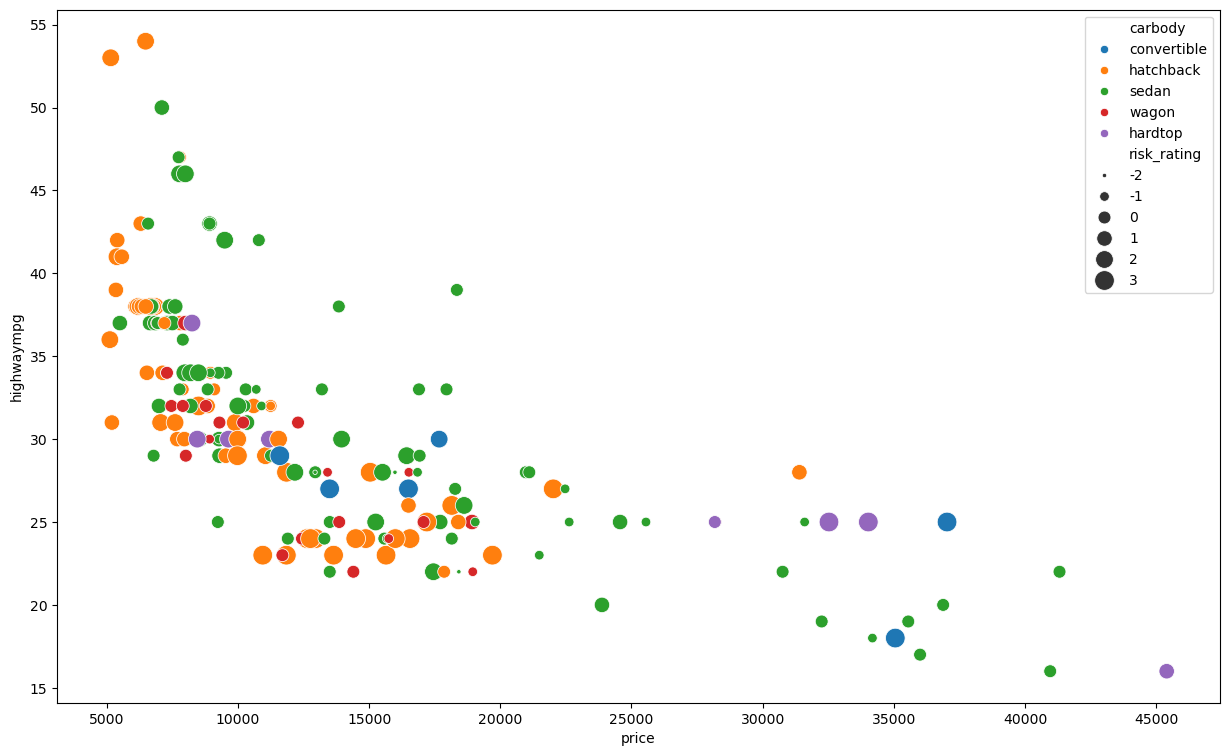

In [181]:
plt.figure(figsize = (15,9))
sns.scatterplot(data = data, x = "price", y = "highwaympg", hue ="carbody" , size = "risk_rating",sizes=(10, 200))

<Axes: xlabel='price', ylabel='enginesize'>

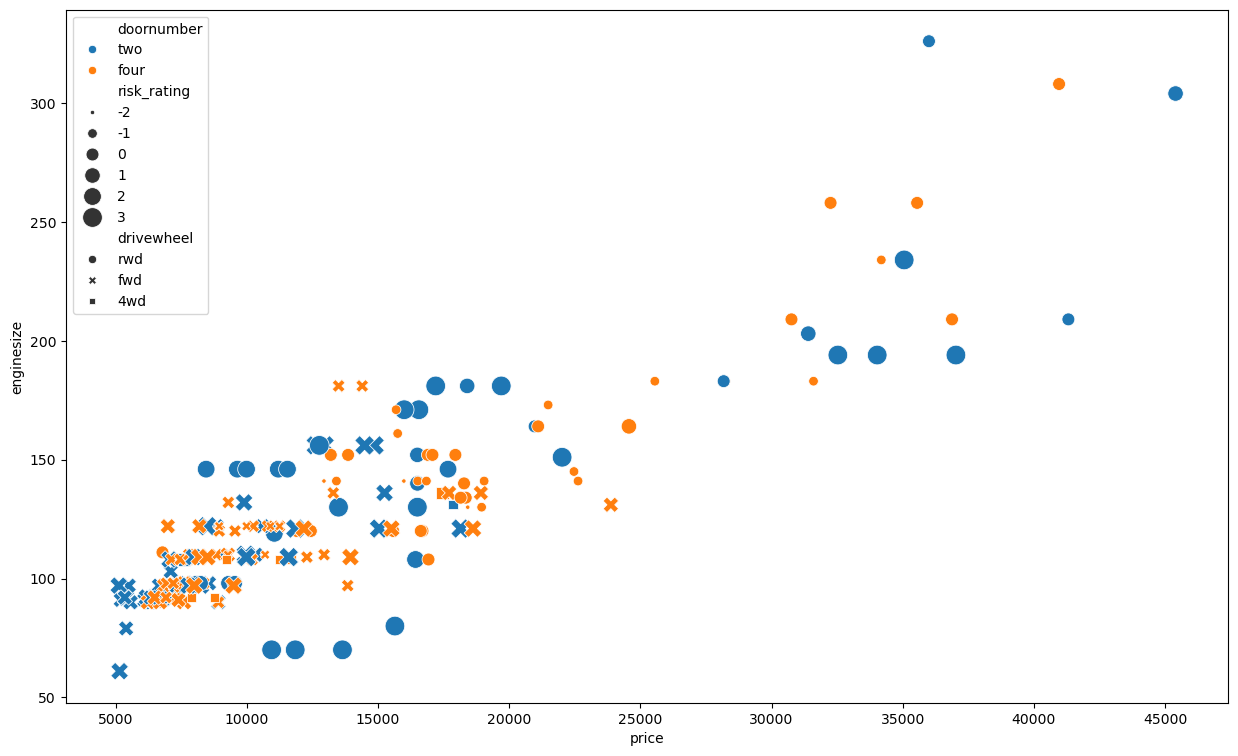

In [184]:
plt.figure(figsize = (15,9))
sns.scatterplot(data = data, x = "price", y = "enginesize", hue ="doornumber" , style  = "drivewheel", size = "risk_rating",sizes=(10, 200))

<font size = 3>

Observations
- Enginesize and price is positively correlated
- Cars with 2 doors have generally higher risk rating
- Cars with fwd (front wheel drive) have less price.

<section name = "Pair-Plot" style = "background-color: #870345;padding:5px"> </section>

# Regression Plots

<section style = "background-color:#e9f6f7; font-size:20px"> 

A <b><font color = "red">regression plot</font> is a type of visualization used to display the relationship between two numerical variables while fitting a regression line to highlight trends and patterns in the data. It helps in understanding how one variable (independent variable on the x-axis) influences another variable (dependent variable on the y-axis).</b> Regression plots are particularly useful for identifying linear or nonlinear relationships, detecting trends, and visualizing the goodness of fit for a regression model.

A typical regression plot consists of data points (represented as a scatterplot) along with a regression line that represents the best-fit relationship between the variables. Additionally, <b> a confidence interval is often included as a shaded region around the regression line, showing the range within which future observations are likely to fall.</b> If the scatter points closely follow the regression line, it suggests a strong relationship between the variables, while a more dispersed distribution indicates a weaker correlation.

<b>To interpret a regression plot, one should examine the direction (positive or negative slope), strength (tight or loose clustering around the line), and confidence interval (narrow or wide shading) of the regression line.</b> A positive slope indicates a direct relationship, while a negative slope suggests an inverse relationship. A wider confidence interval suggests more variability in predictions, whereas a narrower interval indicates greater certainty.

In Python, regression plots are primarily created using the <b> Seaborn library with the <font color = "red"> sns.regplot() </font> or <font color = "red"> sns.lmplot() </font> functions.</b> These functions automatically  fit a regression line to the scatterplot and add confidence intervals. <b>Matplotlib</b> can also be used to plot regression lines manually using <b><font color = "red"> plt.scatter()</font></b> for points and <b><font color = "red"> plt.plot() </font></b> for the fitted line, but this requires additional calculations. Pandas does not have a built-in function for regression plots but allows data preparation for use with Seaborn or Matplotlib. Overall, regression plots are a powerful tool for exploratory data analysis and statistical modeling, providing visual insights into relationships between numerical variables.

<Axes: xlabel='price', ylabel='citympg'>

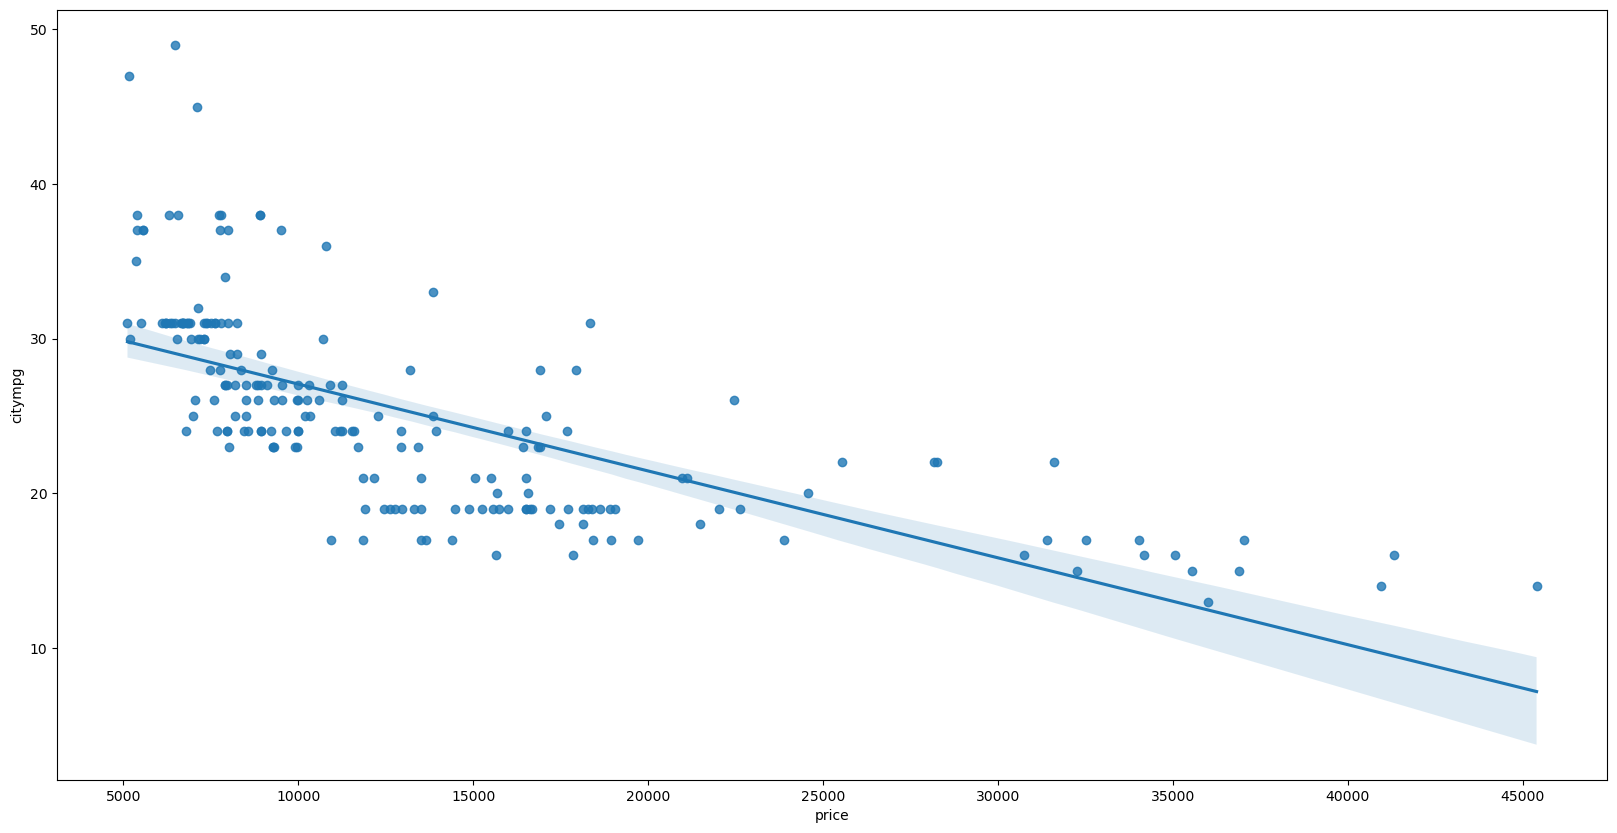

In [199]:
plt.figure(figsize = (20,10))
sns.regplot(data,x = "price", y = "citympg")

<section style = "background-color: #f9e6fa; font-size:20px">
<b>sns.regplot(</b>
<li>     data - data for regplot,
<li>     x - column,
<li>     y - column,
<li>     x_estimator - A function to aggregate y values for each unique x value.np.mean, np.median,
<li>     x_bins - Groups x values into discrete bins and estimates y for each bin.,
<li>     x_ci - Confidence interval for x_estimator.,
<li>     scatter - Whether to plot scatter points. True or False,
<li>     fit_reg - Whether to fit and display the regression line. True or False,
<li>     ci - Size of the confidence interval around the regression line.,
<li>     n_boot - Number of bootstrap samples for computing the confidence interval.A lower value speeds up computation but may reduce accuracy,
<li>     units - Grouping variable for bootstrap sampling.Column name or None,
<li>     seed -  Random seed for reproducibility.,
<li>     order - Order of polynomial regression. Integer (1, 2, 3, etc.).,
<li>     logistic - Fit logistic regression instead of linear regression.,
<li>     lowess - Fit a locally weighted regression.(True or False).,
<li>     robust - Fit a robust regression to handle outliers. (True or False).,
<li>     logx - Apply log transformation to x. (True or False).,
<li>     x_partial -  Residualize x or y variables.Column name or None.,
<li>     y_partial - above,
<li>     truncate - Restrict regression line within data range.(True or False).,
<li>     dropna -  Drop missing values.,
<li>     x_jitter - Add noise to x or y. (x_jitter=0.2),
<li>     y_jitter - above,
<li>     label - Label for legend.,
<li>     color - Regression line color.,
<li>     marker -  Scatter marker style.,
<li>     scatter_kws - Customize scatter and line appearance.,
<li>     line_kws - above,
<li>     ax=None,
)